# Linear regression of luminocity and population density GHS data

### 1k resolution with 2015 Agg NTL data and GHS pop den data

In [36]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import gdal
from osgeo import gdal
from rasterio.plot import show
from osgeo import gdal_array
import sys
import os
import glob
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from scipy import stats

0.0
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
each pixel of the same area for all the days
16256
16256
coefficient of determination: 0.809821752937064
intercept: 0.30895126
slope: [1.9848014]
intercept: [0.30895126]
slope: [[1.9848014]]
predicted response:
[0.30895126 0.30895126 0.30895126 ... 0.30895126 0.30895126 0.30895126]
predicted response:
[[0.30895126]
 [0.30895126]
 [0.30895126]
 ...
 [0.30895126]
 [0.30895126]
 [0.30895126]]
[[0]
 [1]
 [2]
 [3]
 [4]]
[0.30895126 2.29375267 4.27855408 6.26335549 8.24815691]


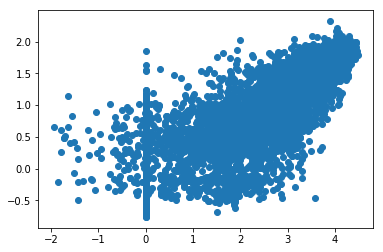

In [43]:

test= gdal_array.LoadFile(r'\\DATASERVER1\GADdata$\dgrant\Documents\ArcGIS\Projects\TestingMyProject\Mexico\clipped_raw\2015\log10_Agg_2015_B1.tif')
test = test.flatten()
test = np.where(test < -3.4028235, 0., test)
print(test[0])
print(test)
                                                     
ghs= gdal_array.LoadFile(r'\\DATASERVER1\GADdata$\dgrant\Documents\ArcGIS\Projects\TestingMyProject\Mexico\clipped_raw\2015\log10_GHS1.tif')
ghs = ghs.flatten()
ghs = np.where(ghs < -3.4028235, 0., ghs)
print(ghs)
print("each pixel of the same area for all the days")

print(len(test))
print(len(ghs))


x = np.array(test).reshape((-1, 1))
y = np.array(ghs)

model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)

print('slope:', new_model.coef_)

y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

x_new = np.arange(5).reshape((-1, 1))
print(x_new)

y_new = model.predict(x_new)
print(y_new)

plt.scatter(y,x)
#plt.plot(np.unique(ghs), np.poly1d(np.polyfit(ghs, test, 1))(np.unique(ghs)))
plt.show()
